# PCA and UMAP
## Principle Component analysis
## Uniform Manifold Approximation and Projection for Dimension Reduction

Anna Poetsch  
26.June 2023

Source material:   
Tutorial: https://umap-learn.readthedocs.io/en/latest/  
Paper: https://arxiv.org/abs/1802.03426  
scRNA-Seq tutorial in Python: https://github.com/theislab/single-cell-tutorial  
blood analysis in Python: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html  
blood analysis in R: https://satijalab.org/seurat/articles/pbmc3k_tutorial.html

Packages (if not available, pip install):

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Load data:

In [2]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins = penguins.dropna()

Show data:

In [3]:
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


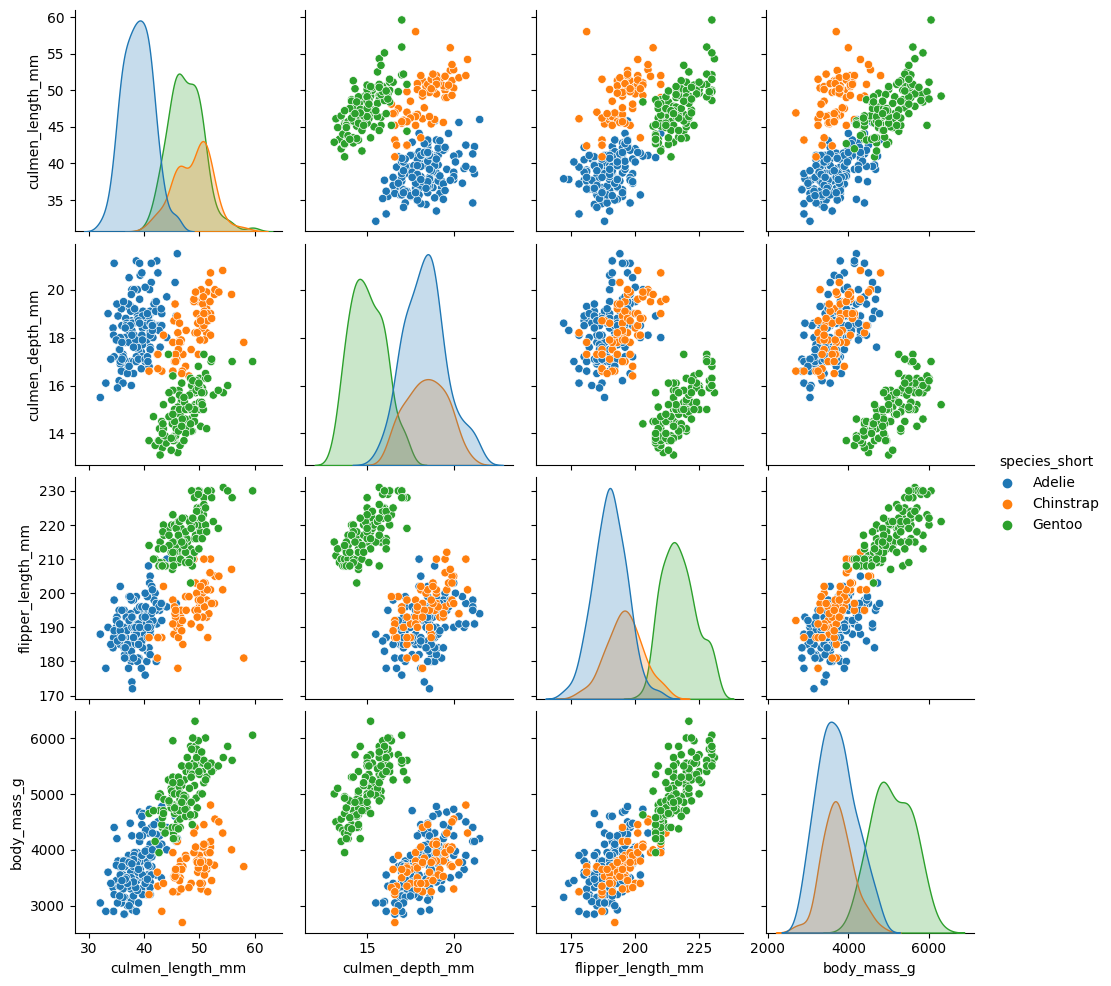

In [4]:
sns.pairplot(penguins, hue='species_short')

## Data scaling
change data format to values:

In [5]:
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

In [6]:
import umap.umap_ as umap #install with 'pip install umap-learn'
np.random.seed(42) #a seed is defined, because there is a random component to UMAP

ModuleNotFoundError: ignored

In [ ]:
reducer = umap.UMAP()

In [ ]:
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [ ]:
scaled_penguin_data

array([[-0.89765322,  0.78348666, -1.42952144, -0.57122888],
       [-0.82429023,  0.12189602, -1.07240838, -0.50901123],
       [-0.67756427,  0.42724555, -0.42960487, -1.19340546],
       ...,
       [ 1.17485108, -0.74326098,  1.49880565,  1.91747742],
       [ 0.22113229, -1.20128527,  0.78457953,  1.23308319],
       [ 1.08314735, -0.53969463,  0.85600214,  1.48195382]])

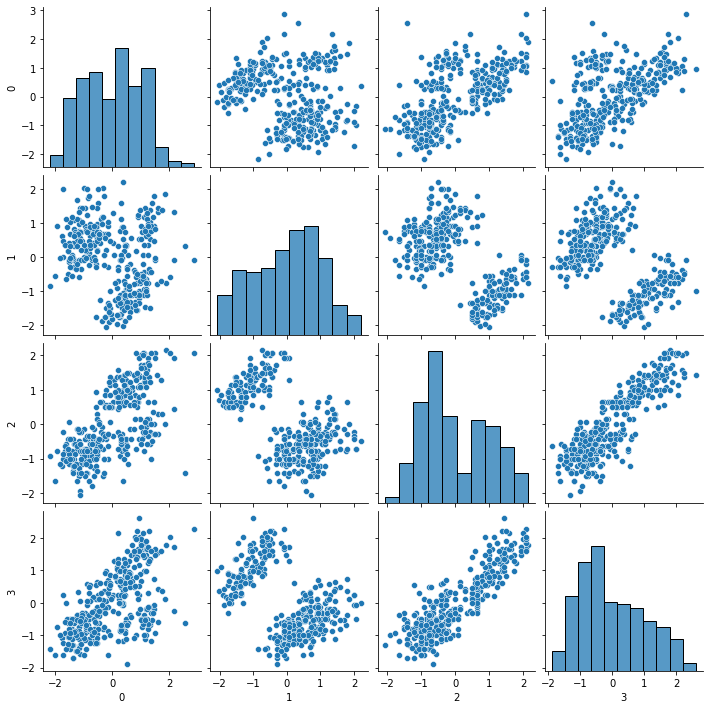

In [ ]:
scaled_df = pd.DataFrame(scaled_penguin_data)

sns.pairplot(scaled_df)

## PCA  
Principle component analysis is a linear dimensionality reduction technique, while UMAP is non-linear. Another popular non-linear one is tSNE.

explained variance ratio: [0.68641678 0.19448404 0.09215558 0.02694359]


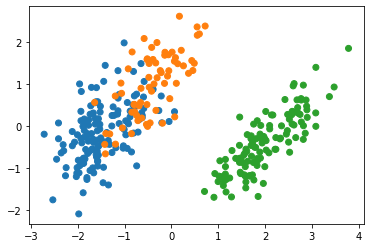

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pen_pca = pca.fit(scaled_penguin_data).transform(scaled_penguin_data)

# Percentage of variance explained for each components
print(
    "explained variance ratio: %s"
    % str(pca.explained_variance_ratio_)
)

plt.scatter(
    pen_pca[:, 0],
    pen_pca[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.show()

The separation of species with PCA did work, but not very well.

## UMAP

In [ ]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])

The separation with UMAP worked generally well, yet there are some Chinstrap penguins that cluster with Gentoo.  
Now we can use the two-dimensional embedding to visualise different data:

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=penguins["culmen_length_mm"])
plt.title("culmen_length_mm")
plt.colorbar()
plt.show()

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=penguins["culmen_depth_mm"])
plt.title("culmen_depth_mm")
plt.colorbar()
plt.show()

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=penguins["flipper_length_mm"])
plt.title("flipper_length_mm")
plt.colorbar()
plt.show()

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=penguins["body_mass_g"])
plt.title("body_mass_g")
plt.colorbar()
plt.show()

### n_neighbors

In [ ]:
for n in (2, 5, 15, 100, 1000):
    reducer = umap.UMAP(n_neighbors=n)
    embedding = reducer.fit_transform(scaled_penguin_data)
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
        )
    plt.title('n_neighbors = {}'.format(n))
    plt.show()

n_neighbors does focus on fine grained structure, when kept small. Then we might miss the bigger picture. When small,it might also generate "sausages", which can be a reason to want to modify the parameters. The higher one goes, the more cramped the clusters become. One should not define more neighbors than there are data points ;-)

### min_dist

In [ ]:
for d in (0.0, 0.1, 0.5, 0.9):
    reducer = umap.UMAP(min_dist=d)
    embedding = reducer.fit_transform(scaled_penguin_data)
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
        )
    plt.title('min_dist = {}'.format(d))
    plt.show()

min_dist defines how close we allow points to lie on top of each other. The higher the value, the more loose our clusters will be.

### metric

In [ ]:
for m in ("euclidean","cosine","correlation"):
    reducer = umap.UMAP(metric=m)
    embedding = reducer.fit_transform(scaled_penguin_data)
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
        )
    plt.title('metric = {}'.format(m))
    plt.show()

There are many more possibilities to define distances. Eucledian is the default, but one might look for an alternative dependent on the data. For example sparse data, i.e. data with many 0s are frequently addressed with cosine distance. Such data are for example RNA-Seq data.

### Randomness
Dont forget, there is a random component as well!  
Now we are introducing different seeds, which will change the random component of UMAP

In [ ]:
for r in (41,41,42,43):
    np.random.seed(r)
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(scaled_penguin_data)
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
    plt.show()

### spread

In [ ]:
for s in (0.5,1,2):
    reducer = umap.UMAP(spread=s)
    embedding = reducer.fit_transform(scaled_penguin_data)
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
        )
    plt.title('spread = {}'.format(s))
    plt.show()

Spread is a parameter that allows increased spread in the two dimensional space. Here it does not make a big difference.